In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from subprocess import check_output

/Users/chjeong/.pyenv/versions/3.6.3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('./data/all_stocks_5yr.csv')
cl = data[data['Name']=='MMM'].close

In [3]:
def set_data(cl):
    scl = MinMaxScaler()
    #Scale the data
    # pandas.__version__ < 0.23
    # cl = cl.reshape(cl.shape[0],1)

    # pandas.__version__ => 0.23
    cl = cl.as_matrix()
    cl = cl.reshape(cl.shape[0],1)

    cl = scl.fit_transform(cl)
    return cl, scl

In [4]:
cl, scl = set_data(cl)

/Users/chjeong/.pyenv/versions/3.6.3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [5]:
cl.shape

(1259, 1)

In [6]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb)])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

In [7]:
X, y = processData(cl,7)

In [8]:
print(X.shape)
print(y.shape)

(1251, 7, 1)
(1251,)


In [9]:
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
251
1000
251


In [10]:
#Build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(256,input_shape=(7,1)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),shuffle=False)

Train on 1000 samples, validate on 251 samples
Epoch 1/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0012 - val_loss: 0.0269
Epoch 2/10
1000/1000 [==============================] - 0s 466us/step - loss: 0.0056 - val_loss: 0.0018
Epoch 3/10
1000/1000 [==============================] - 0s 467us/step - loss: 0.0035 - val_loss: 0.0014
Epoch 4/10
1000/1000 [==============================] - 0s 464us/step - loss: 5.0795e-04 - val_loss: 8.5061e-04
Epoch 5/10
1000/1000 [==============================] - 0s 474us/step - loss: 4.9270e-04 - val_loss: 0.0014
Epoch 6/10
1000/1000 [==============================] - 0s 479us/step - loss: 5.7222e-04 - val_loss: 5.9174e-04
Epoch 7/10
1000/1000 [==============================] - 0s 478us/step - loss: 4.2067e-04 - val_loss: 8.4853e-04
Epoch 8/10
1000/1000 [==============================] - 0s 484us/step - loss: 4.4693e-04 - val_loss: 0.0011
Epoch 9/10
1000/1000 [==============================] - 1s 502us/step - loss: 6.3095e-04 - 

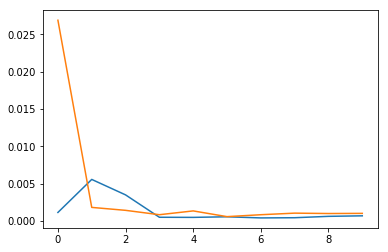

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [12]:
X_test[0]

array([[0.46959459],
       [0.46577002],
       [0.46800102],
       [0.46169046],
       [0.46717236],
       [0.46755482],
       [0.47176186]])

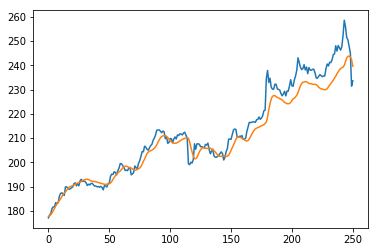

In [13]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [14]:
act = []
pred = []
#for i in range(250):
i=249
Xt = model.predict(X_test[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[242.44907]], actual:[[231.44]]


In [15]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

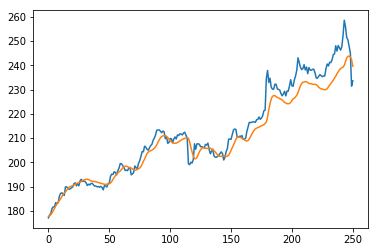

In [16]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [17]:
X_test[249]

array([[0.96003315],
       [1.        ],
       [0.98329934],
       [0.95480622],
       [0.94817695],
       [0.93185875],
       [0.91420194]])

In [18]:
X_test[248]

array([[0.93026517],
       [0.96003315],
       [1.        ],
       [0.98329934],
       [0.95480622],
       [0.94817695],
       [0.93185875]])